### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Data importing

In [2]:
df=pd.read_csv('CE802_P2_Data.csv') 
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


### Separating  the dependent and independent variables

In [3]:
X=df.drop(['Class'],axis=1)
y=df['Class']

###  Exploratory Data Analysis (EDA) 

1. Checking about null values

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   int64  
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 175.9 KB


2. Class distribution

In [5]:
print("True Class : ",len(df.loc[df['Class'] == True]))
print("False Class : ",len(df.loc[df['Class'] == False]))

True Class :  691
False Class :  809


3. Histogram to analyze the range of values in each feature

array([[<AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F5'}>,
        <AxesSubplot:title={'center':'F6'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>],
       [<AxesSubplot:title={'center':'F9'}>,
        <AxesSubplot:title={'center':'F10'}>,
        <AxesSubplot:title={'center':'F11'}>,
        <AxesSubplot:title={'center':'F12'}>],
       [<AxesSubplot:title={'center':'F13'}>,
        <AxesSubplot:title={'center':'F14'}>,
        <AxesSubplot:title={'center':'F15'}>, <AxesSubplot:>]],
      dtype=object)

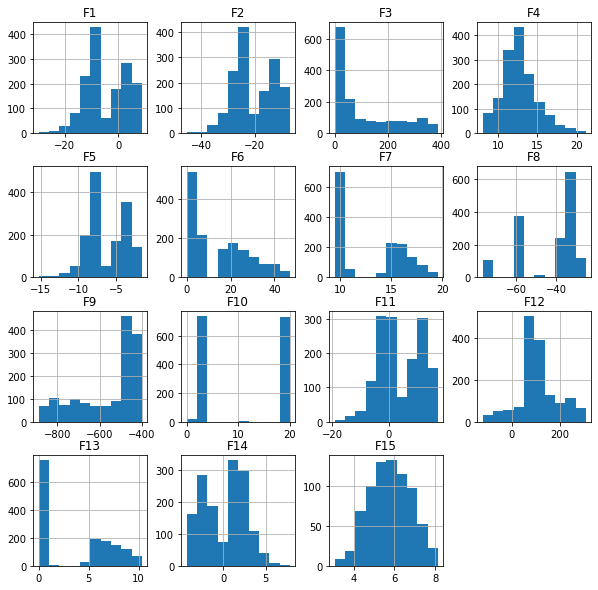

In [6]:
X.hist(figsize=[10,10])

4. Checking values in 15th Feature

In [7]:
print(X['F15'].value_counts())
#X['F15'].mode()

5.16    8
5.24    8
6.12    7
5.94    7
5.75    6
       ..
4.19    1
4.83    1
5.68    1
4.39    1
6.47    1
Name: F15, Length: 331, dtype: int64


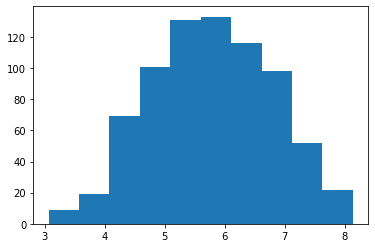

In [8]:
plt.hist(X.F15.values)
plt.show()

Filled F15 Feature with mean

In [9]:
#X['F15'].fillna(X['F15'].mode()[0], inplace=True)
#X['F15'].fillna(X['F15'].mean())
X=X.fillna(X.mean())

In [10]:
#X.describe()

### Find outliers

1. Finding Percentile (25% and 75%)

In [11]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0.25,-10.2600,-26.13,15.0,11.44,-8.13,3.72,10.14,-56.98,-678.72,2.0,-1.95,71.66,0.60,-2.2300,5.783013
0.75,2.9175,-13.11,195.0,13.90,-3.77,24.60,15.87,-30.98,-446.72,20.0,11.10,139.66,7.05,1.9825,5.790000


2. Finding interquartile range

In [12]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,13.1775,13.02,180.0,2.46,4.36,20.88,5.73,26.0,232.0,18.0,13.05,68.0,6.45,4.2125,0.006987


3. Finding the lower limit and upper limit

In [13]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

4. Found the lower value and upper value for outlier for each column

In [14]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
lower limit,-30.02625,-45.66,-255.0,7.75,-14.67,-27.60,1.545,-95.98,-1026.72,-25.0,-21.525,-30.34,-9.075,-8.54875,5.772533
upper limit,22.68375,6.42,465.0,17.59,2.77,55.92,24.465,8.02,-98.72,47.0,30.675,241.66,16.725,8.30125,5.800480


### Removing the outlier values 

In [15]:
df_without_outlier = X[(X>lower_lim)&(X<upper_lim)]
df_without_outlier

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,NaN,8.00,-0.35,NaN
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,5.783013
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,5.783013
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,5.783013
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,5.783013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.35,-20.76,40,11.58,-8.75,41.85,14.52,-56.98,-828.72,20,1.08,159.66,5.90,3.54,5.783013
1496,-12.90,-25.80,8,12.38,-9.51,0.51,9.97,-34.98,-424.72,2,-6.21,75.66,0.54,3.84,5.783013
1497,-3.78,-14.97,155,9.20,-4.18,40.05,15.17,-56.98,-748.72,20,6.96,NaN,6.15,-0.76,NaN
1498,1.38,-14.97,190,13.36,-6.31,33.15,14.47,-36.98,-628.72,20,10.20,NaN,8.30,-2.63,NaN


The values now contains the Nan values after removing the outliers.


In [16]:
df_without_outlier.isnull().sum()

F1       0
F2       0
F3       0
F4      50
F5       3
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12    196
F13      0
F14      0
F15    738
dtype: int64

now we instead of removing these rows we can replace these value with mean of their column. 

In [17]:

#cols=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       #'F12', 'F13', 'F14', 'F15']
#mode = df_without_outlier.filter(cols).mode()

#df_final=df_without_outlier[cols]=df_without_outlier[cols].fillna(mode.iloc[0])

df_final=df_without_outlier.fillna(df_without_outlier.mean())
df_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,105.727485,8.00,-0.35,5.783110
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.660000,0.76,1.79,5.783013
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.660000,0.64,2.02,5.783013
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.660000,0.57,1.98,5.783013
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.660000,6.70,-3.83,5.783013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.35,-20.76,40,11.58,-8.75,41.85,14.52,-56.98,-828.72,20,1.08,159.660000,5.90,3.54,5.783013
1496,-12.90,-25.80,8,12.38,-9.51,0.51,9.97,-34.98,-424.72,2,-6.21,75.660000,0.54,3.84,5.783013
1497,-3.78,-14.97,155,9.20,-4.18,40.05,15.17,-56.98,-748.72,20,6.96,105.727485,6.15,-0.76,5.783110
1498,1.38,-14.97,190,13.36,-6.31,33.15,14.47,-36.98,-628.72,20,10.20,105.727485,8.30,-2.63,5.783110


### Feature scaling 

In [18]:
import pandas as pd
from sklearn import preprocessing

x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.898213,0.833720,0.846154,0.393939,0.713660,0.872611,0.719212,0.384615,0.285714,1.0,0.792422,0.883721,0.772947,0.327614,0.334646
1,0.529138,0.460170,0.007692,0.360606,0.449963,0.112739,0.047291,0.884615,0.922449,0.1,0.481878,0.586047,0.073430,0.502451,0.536026
2,0.379953,0.497293,0.015385,0.418182,0.550037,0.120382,0.050246,0.807692,0.828571,0.1,0.453871,0.427907,0.061836,0.521242,0.536026
3,0.302253,0.540603,0.076923,0.398485,0.487217,0.074522,0.059113,0.884615,0.967347,0.1,0.330313,0.590698,0.055072,0.517974,0.536026
4,0.929293,0.952049,0.769231,0.524242,0.972243,0.624204,0.975369,0.769231,0.938776,1.0,0.774300,0.813953,0.647343,0.043301,0.536026


### Splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, train_size=0.8,random_state=42)

### Decision tree before optimization

In [20]:
dti = DecisionTreeClassifier()
dti = dti.fit(X_train,y_train)
dti_pred=dti.predict(X_test)
score=accuracy_score(y_test,dti_pred)
print("Test score: ",score)

dti_pred_tr=dti.predict(X_train)
score_train=accuracy_score(y_train,dti_pred_tr)
print("Train score: ",score_train)


Test score:  0.8
Train score:  1.0


### Hyperparameter tuning of decision tree

1. Defining parameters

In [21]:
parameters = {'max_depth' : (3,5,7,9,10,15,20)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6,8,10)
              , 'min_samples_leaf': (1,2,3,4,5)
             }

2. Finding best parameters

In [22]:
dti_em=DecisionTreeClassifier()
dti_grid = GridSearchCV(estimator=dti_em , param_grid=parameters,  cv = 8 , verbose = 10,n_jobs=4)
dti_grid.fit(X_train, y_train)
dti1=dti_grid.best_estimator_
dti1

Fitting 8 folds for each of 1050 candidates, totalling 8400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1800s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0310s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0700s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0899s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1569s.) Setting batch_size=32.
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Don

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=5, min_samples_split=8)

3. Training and preeiction after optimization

In [23]:
dti1.fit(X_train, y_train)
pred_dti_opt = dti1.predict(X_test)
acc_dti= metrics.accuracy_score(y_test,pred_dti_opt)*100
print('Testing accuracy after optimization: ',acc_dti)

pred_dti_opt_ = dti1.predict(X_train)
acc1_dt= metrics.accuracy_score(y_train,pred_dti_opt_)*100
print('Training accuracy after optimization: ',acc1_dt,'\n')

#print('Confusion matrix:\n',metrics.confusion_matrix(y_test, pred_dti_opt),'\n')
#print("Classification Report Support Vector : \n")
#print(metrics.classification_report(y_test, pred_dti_opt))

Testing accuracy after optimization:  72.66666666666667
Training accuracy after optimization:  91.58333333333334 



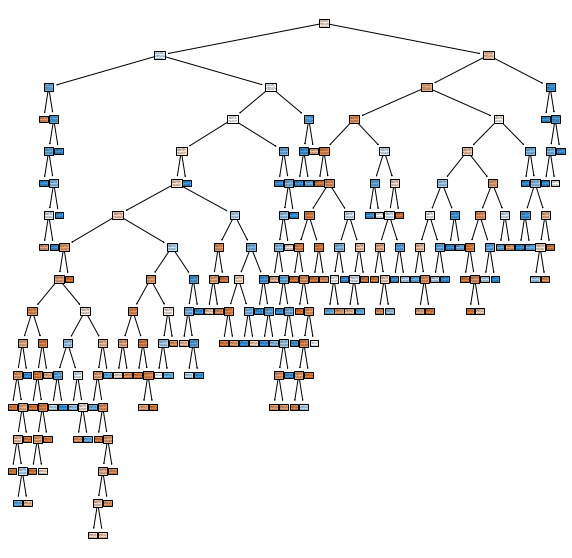

In [24]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dti1, 
                   feature_names=df.columns,  
                   class_names=["True","False"],
                   filled=True)

In [25]:
tre_rep_text = tree.export_text(dti)
print(tre_rep_text)

|--- feature_14 <= 0.62
|   |--- feature_14 <= 0.50
|   |   |--- feature_1 <= 0.25
|   |   |   |--- class: True
|   |   |--- feature_1 >  0.25
|   |   |   |--- feature_6 <= 0.82
|   |   |   |   |--- feature_9 <= 0.75
|   |   |   |   |   |--- feature_10 <= 0.55
|   |   |   |   |   |   |--- feature_12 <= 0.10
|   |   |   |   |   |   |   |--- feature_3 <= 0.22
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- feature_3 >  0.22
|   |   |   |   |   |   |   |   |--- feature_10 <= 0.53
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_10 >  0.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.22
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- tru

### Gradient Boosting Classifier before optimization 

In [26]:
xg = XGBClassifier()
xg = xg.fit(X_train,y_train)
xg_pred=xg.predict(X_test)
score_xg=accuracy_score(y_test,xg_pred)
print("Test score xg: ",score_xg)
xg_pred_tr=xg.predict(X_train)
score_train_xg=accuracy_score(y_train,xg_pred_tr)
print("Train score xg: ",score_train_xg)

Test score xg:  0.9
Train score xg:  1.0


### Optimization of Gradient Boosting Classifier

1. Defining the parameters and getting best parameters

In [27]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()


params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20,0.25] ,
 "max_depth"        : [ 3, 5, 6],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [ 0.3, 0.4, 0.6 ]
    
} 

xgboost_grid = GridSearchCV(estimator=xgboost , param_grid=params,  cv = 3 ,verbose = 10,n_jobs=4)
xgboost_grid.fit(X_train, y_train)
xgboost=xgboost_grid.best_estimator_
xgboost

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    7.2s
[Parallel(

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

2. Training and prediction of Gradient Boosting Classifier after optimization

In [28]:
xgboost.fit(X_train, y_train)
pred_xgboost_opt = xgboost.predict(X_test)
acc_xgboost= metrics.accuracy_score(y_test,pred_xgboost_opt)*100
print('Testing accuracy after optimization: ',acc_xgboost)

pred_xgbooat_opt_ = xgboost.predict(X_train)
acc1_xg= metrics.accuracy_score(y_train,pred_xgbooat_opt_)*100
print('Training accuracy after optimization: ',acc1_xg,'\n')

Testing accuracy after optimization:  89.0
Training accuracy after optimization:  99.41666666666666 



### Support vector before optimization

In [29]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)

acc_test= metrics.accuracy_score(y_test,predictions)*100
print('Test accuracy before optimization ',acc_test)

y_pred_tr_svc=model_svc.predict(X_train)
print("Train accuracy before optimization :",metrics.accuracy_score(y_train, y_pred_tr_svc)*100)


metrics.confusion_matrix(y_test, predictions)

Test accuracy before optimization  84.0
Train accuracy before optimization : 86.33333333333333


array([[130,  27],
       [ 21, 122]], dtype=int64)

### Optimization of Supper vector classifier

1. Defining the parameters and getting best parameters

In [30]:
  
# defining parameter range
svc_param_grid = {'C': [0.1, 1,3,4,6,8,10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 

svc_em=SVC()
svc_grid = GridSearchCV(estimator=svc_em , param_grid=svc_param_grid,  cv = 10 , verbose = 10,n_jobs=4)
svc_grid.fit(df_scaled, y)
svcc1=svc_grid.best_estimator_
svcc1

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1619s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 172 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 202 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 266 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapse

SVC(C=3, gamma=1, kernel='poly')

2. Training and predictio after optimization

In [31]:
svcc1.fit(X_train, y_train)
predictions_optt = svcc1.predict(X_test)
acc= metrics.accuracy_score(y_test,predictions_optt)*100
print('Testing accuracy after optimization: ',acc)

predictions_ = svcc1.predict(X_train)
acc1= metrics.accuracy_score(y_train,predictions_)*100
print('Training accuracy after optimization: ',acc1,'\n')

print('Confusion matrix:\n',metrics.confusion_matrix(y_test, predictions_optt),'\n')
print("Classification Report Support Vector : \n")
print(metrics.classification_report(y_test, predictions_optt))

Testing accuracy after optimization:  89.33333333333333
Training accuracy after optimization:  94.25 

Confusion matrix:
 [[137  20]
 [ 12 131]] 

Classification Report Support Vector : 

              precision    recall  f1-score   support

       False       0.92      0.87      0.90       157
        True       0.87      0.92      0.89       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### Importing test data and drop the label

In [32]:
df_test=pd.read_csv('CE802_P2_Test.csv') 
df_test=df_test.drop(['Class'],axis=1)

### Fill the missing values with mean

In [33]:
df_test=df_test.fillna(df_test.mean())

### Feature scaling for test data


In [34]:


x2 = df_test.values
min_max_scaler_test = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler_test.fit_transform(x2)
df_scaled_test = pd.DataFrame(x_scaled_test)
df_scaled_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.546296,0.476675,0.0525,0.337893,0.532847,0.116900,0.080229,0.884615,0.824,0.1,0.449619,0.409524,0.022330,0.655449,0.737089
1,0.555556,0.374046,0.0250,0.270862,0.515815,0.109911,0.073543,0.884615,0.932,0.1,0.455546,0.452381,0.001942,0.451923,0.599374
2,0.747685,0.484309,0.2750,0.283174,0.835361,0.437738,0.751671,0.000000,0.220,1.0,0.795936,0.214286,0.558252,0.196314,0.457957
3,0.792438,0.776930,0.3000,0.084815,0.858070,0.593393,0.579752,0.384615,0.060,1.0,0.661304,0.809524,0.781553,0.212340,0.457957
4,0.760802,0.927905,0.8625,0.414501,0.867802,0.736341,0.536772,0.769231,0.860,1.0,0.826418,0.571429,0.951456,0.180288,0.580595


### Saving the trained model on full data and then saving the model into disk

In [35]:
svc_app = svcc1.fit(df_scaled.values, y)
model_svc1 = 'Svc1234.sav'
joblib.dump(svc_app, model_svc1)


['Svc1234.sav']

### Loading the model from disk and getting predictions

In [36]:
pred_svcc = svc_app.predict(df_scaled_test.values)
score_final_svc=accuracy_score(y,pred_svcc)
score_final_svc

0.5173333333333333

### Customer Product (Expensive) prediction 

In [37]:
from collections import Counter
final_list=list(pred_svcc)
print(Counter(final_list).keys())
Counter(final_list).values()

dict_keys([True, False])


dict_values([475, 1025])

### Converting predicted labels into dataframe and combining with test data

In [38]:
pred_final=svc_app.predict(df_scaled_test.values)
dataframe_final_test=pd.DataFrame(pred_final, columns=['Class']) 

### Converting dataframe  into required CSV format

In [39]:
predicted_data=pd.concat([df_test, dataframe_final_test], axis=1)
predicted_data.to_csv('CE802_P2_Test.csv', sep=',', index=False,header=True)